# Introduction
In Part II, we explored the text data using wordclouds to build an intuition. In this Part, we will first prepare our text data into a form that is suitable for machine learning modelling. After that, we will train a classifier model.

In this Part, we will:
1. Load our libraries
2. Read our text data
3. Clean our data even further
4. Perform td-idf vectorization
5. Train a machine learning model
6. Tune the dataset and retraining

Normally, we'd separate the Part for pre-training data preparation from the Part for machine learning but we decided to combine both parts - we'll tell you why later. 

### Part 1: Import libraries
Import the following libraries:
1. pandas as pd
2. STOPWORDS from wordcloud

You might be wondering why we imported something from wordcloud - it's a special tool that we'll use later. We will need it to clean our 'cleaned_definitions' further.

In [1]:
# [Optional] Print STOPWORDS

In [2]:
# Step 1: Import your libraries 
import pandas as pd
from wordcloud import STOPWORDS

print(STOPWORDS)

{'it', "shan't", 'there', "we'll", 'between', 'their', 'our', "how's", 'to', "didn't", 'ever', "haven't", 'during', "she'll", "wasn't", 'in', "she's", 'where', "where's", 'since', 'ought', 'i', 'not', 'who', 'is', "they're", 'by', 'these', 'for', 'ourselves', 'itself', 'if', 'hence', 'like', 'com', "wouldn't", 'her', 'nor', "you've", 'she', 'as', "he's", "shouldn't", "i'll", 'an', 'or', "aren't", 'from', 'that', 'of', 'he', 'what', 'hers', 'r', "who's", 'this', "i've", 'myself', "hadn't", 'otherwise', 'own', 'such', 'again', 'was', 'with', 'once', "they've", 'same', "that's", 'very', 'are', 'him', 'had', 'been', 'http', "don't", "you're", 'having', 'about', "you'll", 'just', 'then', 'have', 'until', 'on', "let's", 'also', 'more', "he'll", 'therefore', 'should', 'only', "doesn't", "mustn't", 'do', 'against', 'above', 'get', "won't", 'below', 'too', 'yourselves', 'why', 'were', 'up', "he'd", "i'd", 'www', 'through', 'has', 'your', "couldn't", "weren't", 'its', 'can', "we've", 'how', 'off

### Step 2: Read your CSV from Part I
Let's import the CSV that we exported at the end of Part I. 

Make sure your resulting DataFrame has 2,286 rows and 3 columns.

In [3]:
# Step 2: Read your CSV
df = pd.read_csv("ManualTag_Misogyny_Clean.csv", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2286 entries, 0 to 2285
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Definition          2286 non-null   object 
 1   is_misogyny         2286 non-null   float64
 2   cleaned_definition  2286 non-null   object 
dtypes: float64(1), object(2)
memory usage: 71.4+ KB


## Data Preparation
### Step 3: Create a new column without stopwords
Remember the STOPWORDS we imported? We will use it as a reference to remove stopwords from the text in the 'cleaned_defintion' column.

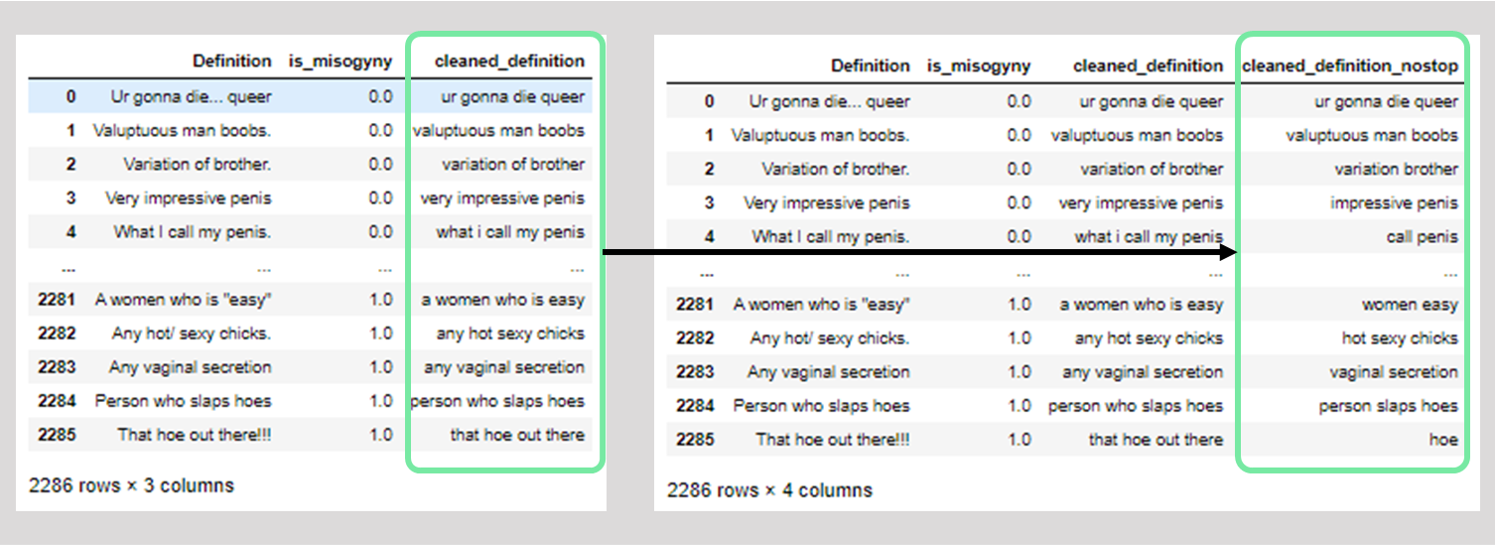

We will create a new column named 'cleaned_definition_nostop', where we remove common words such as 'very', 'what', 'I', etc.

There are many ways to do it, so give it a try!

<strong>Hint: Google "python remove stop words from pandas dataframe"</strong>

In [4]:
# Step 3: Remove stopwords from the text in 'cleaned_definition'
stop = list(STOPWORDS)

#for every word in s, check and add to list if it's not stop word
#returns a string of no stopwords
def remove_stopwords(s):
    list_nostop = [item for item in s.split() if item not in stop]
    return " ".join(list_nostop)

df['cleaned_definition_nostop'] = df['cleaned_definition'].map(remove_stopwords)

### Step 4: Import TfidfVectorizer
To prepare our data into a form that will be usable for machine learning, we will turn our text data into a binary vector. 

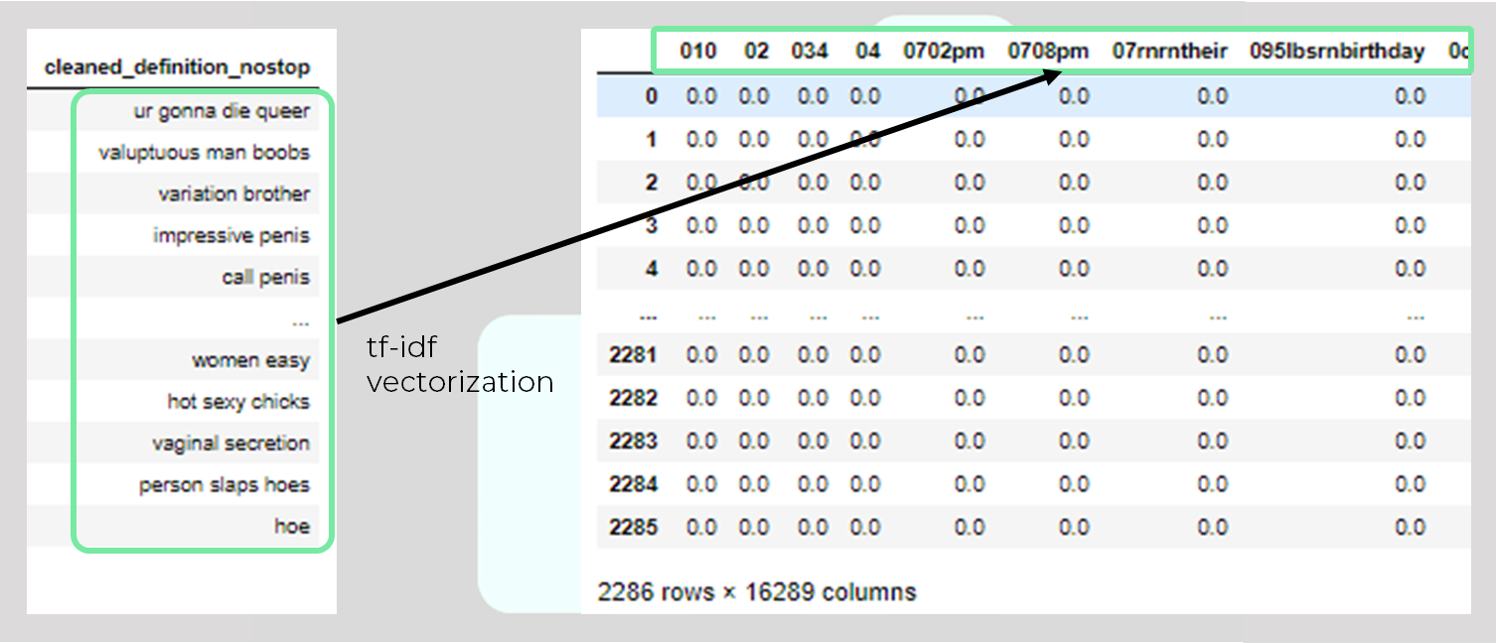

Term frequency-inverse document frequecy (Tf-idf) is a score that highlights words that are more interesting, i.e. words that occur in a document but not across many documents.

You should check articles out on the math - it's very fascinating. 

First, import your TfidfVectorizer from sklearn.feature_extraction.text.

In [5]:
# Step 4: Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

### Step 5: Vectorize your 'cleaned_definition_nostop'
Time to vectorize your 'cleaned_definiton_nostop' column and get each word's tf-idf score.

It works like this:
1. Assign a variable with the TfidfVectorize object
2. Use the .fit_transform method from the object on the column values

The result is a sparse matrix (not a DataFrame yet). 

It'll look something like:
```
<m x n sparse matrix of type '<class 'numpy.float64'>' with x stored elements in Compressed Sparse Row format>
```
where m is the number of rows and n is the number of columns.

In [6]:
print(df['cleaned_definition_nostop'].tolist())

['ur gonna die queer', 'valuptuous man boobs', 'variation brother', 'impressive penis', 'call penis', 'real man eats', 'every man fears', 'named dick', 'gay guy farts', 'man ejaculates', 'man jacks', 'man gets boner', 'two bros frolic', 'gay ugly', 'whip penis', 'fuck', 'ate pies', 'cares fake', 'young bisexual male', 'buttsex rearranged', 'slang lesbian', 'cum bubble thera', 'penis butt', 'short dick syndrome', 'vampire brothel', 'babys vaginal lips', 'batty riders penis', 'beaner fob', 'big jewish softcock', 'black persons cock', 'bonham w 2 cock', 'bro taking shower', 'bro retarded', 'broke mans cadillac', 'broken glass bottle', 'brown girls bosom', 'brown skined person', 'burnt severed penis', 'chineese black man', 'codename penis', 'complete cock block', 'complete homosexual', 'complex sexual move', 'damn sexy beast etc', 'dirty niggers cock', 'drizzle gizcum', 'extremely gay thing', 'fag homosexual', 'fart penis', 'flamboyant gay male', 'flaming homosexual', 'friend cheap', 'fuck

In [7]:
corpus = df['cleaned_definition_nostop'].tolist()

# Step 5a: Declare your TfidVectorizer object
vectorizer = TfidfVectorizer()

# Step 5b: Perform a fit_transform method with the 'cleaned_definition_nostop' column values
X = vectorizer.fit_transform(corpus)


In [8]:
print(vectorizer.get_feature_names())

['010', '02', '034', '04', '0702pm', '0708pm', '07rnrntheir', '095lbsrnbirthday', '0chan', '10', '100', '1000', '100000', '1000s', '100m', '100s', '101', '103', '10cup', '10th', '11', '110', '1100', '1120am', '1129am', '1134am', '1136am', '117', '12', '12rnthe', '12th', '13', '1337', '1338', '135', '1350', '137rnrnborn', '13th', '14', '15', '15000', '1500s', '151', '1516', '1530s', '155chinknn2', '1583', '1590nnmany', '16', '160', '168', '17', '1750', '179', '1790s', '18', '180', '1823', '18481933', '18nnin', '19', '1920s', '1934', '1939', '1940', '1940and', '1941', '1941spring', '1942', '1942winter', '1943', '1944', '1948', '1950s', '19582009', '1960', '1960s', '1961', '1964', '1968', '1970', '1970s', '1970srn5', '1971', '1971nnii', '1972', '1973', '1979', '1979rnrnafter', '1980s', '1982', '1983', '1984', '1985', '1987', '1988', '1988rnrntransitive', '1989', '1990s', '1991', '1992', '1993', '1995', '1996', '1997', '19992009', '1a', '1california', '1generally', '1goths', '1nna', '1rnad

In [9]:
print(X.shape)

(2286, 16289)


### Step 6: Turn the sparse matrix into a DataFrame
The sparse matrix data type happens because we need to tokenize each word and set it up as columns. Since the resulting matrix can be potentially huge, the data object is created for loading efficiency.

The data we're working with is still ok if we turned it into a DataFrame so let's do that. There are a few ways to do it, so get curious! 

<strong>Hint: Google "convert sparse matrix to dataframe python"</strong>

<strong>Hint 2: You can get the column names from your TfidfVectorizer object</strong>

In [10]:
# Step 6: Convert the sparse matrix into a DataFrame
df_X = pd.DataFrame.sparse.from_spmatrix(X, columns=vectorizer.get_feature_names())

## Model training
The reason why we moved immediately into model training because if you tried to convert the DataFrame containing TF-IDF scores right now into a CSV form, you will encounter difficulties. 

More specifically, the CSV would take hundreds of MBs and would take a long time for export. As such, we move directly to model training after this. 

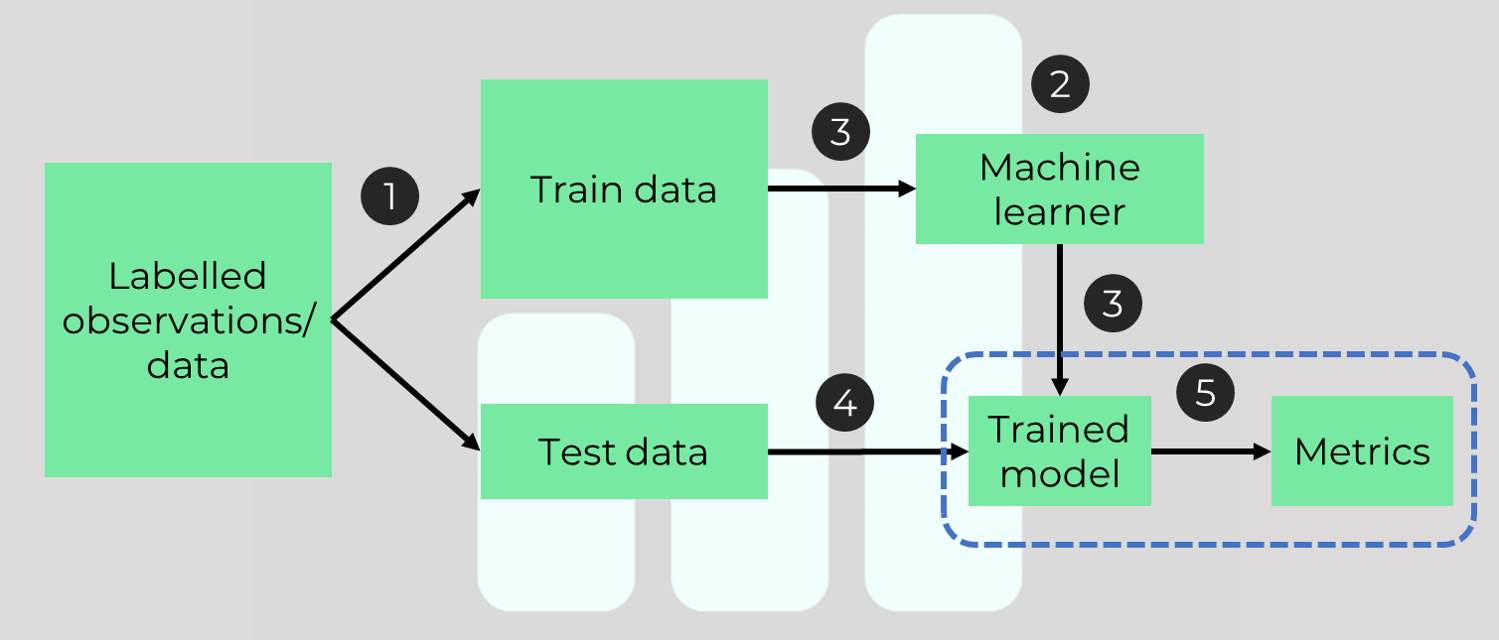

We put this section on all of the projects in UpLevel so bear with us if you've seen this before. 

Generally, the machine learning process has five parts:
1. <strong>Split your data into train and test set</strong>
2. <strong>Model creation</strong>
<br>
Import your models from sklearn and instantiate them (assign model object to a variable)
3. <strong>model fitting</strong>
<br>
Fit your training data into the model and train train train
4. <strong>model prediction</strong>
<br>
Make a set of predictions using your test data, and
5. <strong>Model assessment</strong>
<br>
Compare your predictions with ground truth in test data

Highly recommended readings:
1. [Important] https://scipy-lectures.org/packages/scikit-learn/index.html
2. https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/
3. https://scikit-learn.org/stable/tutorial/basic/tutorial.html

### Step 7: Import your machine learning libraries
Let's import the following machine learning libraries:
1. train_test_split from sklearn.model_selection
2. DummyClassifier from sklearn.dummy
3. LogisticRegression from sklearn.linear_model
4. DecisionTreeClassifier from sklearn.tree
5. RandomForestClassifier from sklearn.ensemble
6. f1_score from sklearn.metrics
7. confusion_matrix from sklearn.metrics

In [11]:
# Step 7: Import your ML libraries
from  sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix

### Step 8: Prepare your independent and dependent variables
Now that we have everything done, let's prepare our independent variables (the TF-IDF DataFrame from Step 6) and the dependent variable - 'is_misogyny'. 

1. Declare a variable, and assign your independent variables to it, the DataFrame from Step 6
2. Declare a variable, and assign only values from "is_misogyny"

In [12]:
# Step 8: Prepare your indepedent and independent variables
y = df['is_misogyny']

### Step 9: Split your indepedent and dependent variables into train and test sets
We'll be using a 80/20 split for train and test set respectively, using the train_test_split function, stratified by y. 

In [13]:
# Step 9: Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.2, stratify=y)

### Step 10: Train your DummyClassifier model
Once you've split your data, machine learning begins. 

This is what you'll need to do:
1. Start with a model
2. Declare a variable, and store your model in it (don't forget to use brackets)
3. Fit your training data into the instantiated model
4. Declare a variable that contains predictions from the model you just trained, using the train dataset (X_test)
5. Print the f1_score between the actual y values and the predictions
6. Print the confusion matrix between the two values

Also, the recommended readings will be very helpful.

We will start with DummyClassifier to establish the baseline.

In [14]:
# Step 10a: Declare a variable to store the DummyClassifier model
dummy_clf = DummyClassifier()

# Step 10b: Fit your train dataset
dummy_clf.fit(X_train, y_train)

# Step 10c: Declare a variable and store your predictions that you make with your model using X test data
prediction = dummy_clf.predict(X_test)

# Step 10d: Print the f1_score between the y test and prediction
print(f1_score(y_test, prediction))

# Step 10e: Print the confusion matrix using the y test and prediction
print(confusion_matrix(y_test, prediction))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


0.42606516290726815
[[144 107]
 [122  85]]


### Step 11: Train a LogisticRegression model
Similarly, let's do what we did with DummyClassifier - that model is a classifier that randomly pics wrongly to establish a baseline. 

Train a LogisticRegression model and assess its performance.

In [15]:
# Step 11a: Declare a variable to store the LogisticRegression model
lr = LogisticRegression()

# Step 11b: Fit your train dataset
lr.fit(X_train, y_train)

# Step 11c: Declare a variable and store your predictions that you make with your model using X test data
pred_lr = lr.predict(X_test)

# Step 11d: Print the f1_score between the y test and prediction
print(f1_score(y_test, pred_lr))

# Step 11e: Print the confusion matrix using the y test and prediction
print(confusion_matrix(y_test, pred_lr))


0.8
[[248   3]
 [ 67 140]]


### Step 12: Train a DecisionClassifier model
Same drill - let's see if using DecisionTree classifier changes things.

In [16]:
# Step 12: Train a DecisionTreeClassifer model
# Step 12a: Declare a variable to store the DecisionTreeClassifer model
tree = DecisionTreeClassifier()

# Step 12b: Fit your train dataset
tree.fit(X_train, y_train)

# Step 12c: Declare a variable and store your predictions that you make with your model using X test data
pred_tree = tree.predict(X_test)

# Step 12d: Print the f1_score between the y test and prediction
print(f1_score(y_test, pred_tree))

# Step 12e: Print the confusion matrix using the y test and prediction
print(confusion_matrix(y_test, pred_tree))


0.8456057007125891
[[215  36]
 [ 29 178]]


### Step 13: Train a RandomForestClassifier model
The process is random, but DecisionTreeClassifier should do better than LogisticRegression. Now, we try RandomForestClassifier to see if it'd be even better.

In [17]:
# Step 13: Train a RandomForestClassifier model
# Step 13a: Declare a variable to store the RandomForestClassifier model
rf = RandomForestClassifier()

# Step 13b: Fit your train dataset
rf.fit(X_train, y_train)

# Step 13c: Declare a variable and store your predictions that you make with your model using X test data
pred_rf = rf.predict(X_test)

# Step 13d: Print the f1_score between the y test and prediction
print(f1_score(y_test, pred_rf))

# Step 13e: Print the confusion matrix using the y test and prediction
print(confusion_matrix(y_test, pred_rf))


0.8654353562005278
[[243   8]
 [ 43 164]]


### Step 14: Get feature importance from model and create a DataFrame
The results from the RandomForest training should be astounding. Let's take a look at what features are important in its classifiying ability.

Create a DataFrame containing the feature importances (you can use the .feature_importances attribute from the model), and match it with the column names (you can get it from the .columns attribute from the independent variables). 

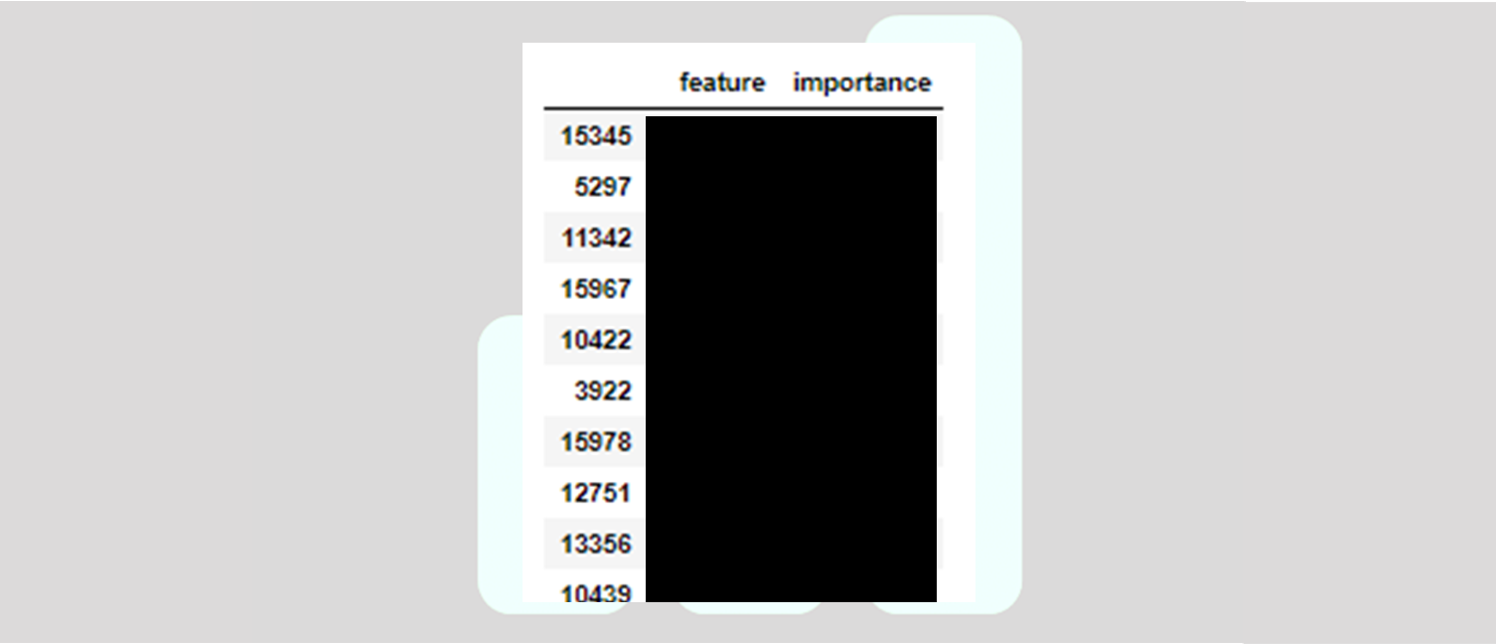

After that, sort the resulting DataFrame in a descending order to see the top features importances.

In [29]:
# Step 14: Create a DataFrame containing the feature importances of your model and sort! 
df_rf = pd.DataFrame(rf.feature_importances_, index=df_X.columns, columns=['feature importance'])

In [32]:
df_rf.sort_values(by='feature importance',ascending=False)

,feature importance
vagina,0.063217
female,0.045309
pussy,0.039323
woman,0.026357
dick,0.013550
...,...
inefficientcy,0.000000
inept,0.000000
inevitable,0.000000
inexplicable,0.000000


In [49]:
df_rf[df_rf['feature importance'] > 0].sort_values(by='feature importance',ascending=False)

,feature importance
vagina,6.321679e-02
female,4.530852e-02
pussy,3.932330e-02
woman,2.635727e-02
dick,1.355039e-02
...,...
youd,4.168100e-09
glbt,3.468297e-09
slice,3.226784e-09
blogs,2.820812e-09


### Step 15: Repeat Steps 5-6 with max_features
Noticed something from your DataFrame? The top features seem to resemble something you might have seen in the previous Part.

Turns out you don't really need so many features from your vectorization. 

Repeat your vectorization but <strong>limit the number of features extracted to 100</strong> by adding the 'max_features' parameter when you create the TfidfVectorizer object.

In fact, it's better to limit the features so that you don't spend too much time training your models and avoid overfitting. 

In [33]:
# Step 15a: Declare your TfidVectorizer object, but add the max_features parameter - 100 features
vec = TfidfVectorizer(max_features=100)

# Step 15b: Perform a fit_transform method with the 'cleaned_definition_nostop' column values
X2 = vec.fit_transform(corpus)

# Step 15c: Convert the sparse matrix into a new DataFrame
df_X2 = pd.DataFrame.sparse.from_spmatrix(X2, columns=vec.get_feature_names())

### Step 16: Repeat Steps 8-13
Now that you have a new DataFrame, you'll have to:
1. Prepare the independent variables (dependent variable remains the same)
2. Perform the splitting of the data into train and test
3. Train a model - stick to RandomForest or other models that you liked
4. Perform prediction and assess predictions using f1_score and confusion matrix

Let's see if your model's performance improves with only 100 features extracted.

In [34]:
# Step 16a: Prepare your indepedent and independent variables

# Step 16b: Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_X2, y, test_size=0.2, stratify=y)

# Step 16c: Train a RandomForestClassifier model (or other models)
rf2 = RandomForestClassifier()

# Step 16d: Make a new set of predictions
rf2.fit(X_train, y_train)
pred_rf2 = rf2.predict(X_test)

# Step 16e: Assess your prediction with f1_score and confusion_matrix
print(f1_score(y_test, pred_rf2))
print(confusion_matrix(y_test, pred_rf2))

0.8184143222506394
[[227  24]
 [ 47 160]]


### Step 17: Repeat Steps 15-16 with different max_feature values
Your model with 100 features will mostly likely be worse performing than 16k features. 

Don't be sad! Let's tweak the number of max_features from 100 to higher numbers, in increment of 250.

<strong>Hint: you should find what you're seeking between 750 to 1250 features</strong>

In [45]:
# Step 17a: Tweak your TfidVectorizer object
vec = TfidfVectorizer(max_features=800)
X2 = vec.fit_transform(corpus)
df_X2 = pd.DataFrame.sparse.from_spmatrix(X2, columns=vec.get_feature_names())

# Step 17b: Retrain your RandomForestClassifier model
X_train, X_test, y_train, y_test = train_test_split(df_X2, y, test_size=0.2, stratify=y)

rf2 = RandomForestClassifier()
rf2.fit(X_train, y_train)
pred_rf2 = rf2.predict(X_test)
print(f1_score(y_test, pred_rf2))
print(confusion_matrix(y_test, pred_rf2))

0.8740359897172237
[[239  12]
 [ 37 170]]


## Model testing
Once you're satisfied with the model performance, let's test the model with totally unseen data and see if you can classify the text as misogynist or otherwise. You can transform unseen data with the .transform method of the TfdifVectorizer object from Step 5.

### Step 18: Test a few strings and see if they are misogynist or not
Come up with a few strings and see if they are misogynist.

More specifically, here are the steps:
1. Declare three strings, make sure one of them is misogynist
2. Append them into a single list
3. Use the .transform method of your TfidfVectorizer object to transform your strings
4. Use the trained model's predict method on your transformed vectors
5. See if the prediction matches what you came up with

Note: Even if you're transforming a single string, you'll have to put it inside a list first before passing through the 'transform' method by the TfidfVectorizer object.

In [46]:
# Step 18a: Declare a few strings containing mock definitions 
str1 = "problems bitch need machine gun"
str2 = "around world speak language booty explaining understand talk dirty"
str3 = "Mary had little lamb"

# Step 18b: Append the strings into a list
new_corpus = [str1,str2,str3]

# Step 18c: .transform these strings using the TfidfVectorizer object
new_X_test = vec.transform(new_corpus)

# Step 18d: Use the trained RandomForest model to predict what class your strings are
new_pred = rf2.predict(new_X_test)

print("new corpus prediction:", new_pred)

new corpus prediction: [1. 0. 0.]


# The end
And that's the end! Good job if your model was able to predict correctly what class the sentences are. Don't worry if it  didn't - it happens. But now we're done! 

To recap, you've:
1. Collected manually annotated data from a research team
2. Clean the data
3. Performed wordcloud analysis
4. Extracted TF-IDF scores from the text column data
5. Trained a machine learning model to predict whether a sentence is misogynist or not

Go on, give yourself a pat on the back. We hope this project series has give you more confidence in coding and machine learning. 

Whatever you learn here is but a tip of the iceberg, and launchpad for bigger and better things to come. Come join us in our Telegram community over at https://bit.ly/UpLevelSG and our Facebook page at https://fb.com/UpLevelSG